In [13]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
from pycaret.regression import *

In [2]:
#import data set, dataset was downloaded from Kaggle:https://www.kaggle.com/datasets/hamidrezabakhtaki/fmcg-export-sale
df=pd.read_csv("ExportSales.csv",index_col=1,parse_dates=True)
df.head(2)

,ID,Category,Invoice Number,Product Code,Customer Code,Destenation,QTY,Total Price,Destination full name
Date,,,,,,,,,
2019-04-28,2529604,Category5,267,30011006,612,IRQ,750,3334.8225,Iraq
2019-04-29,2529605,Category5,302,30011006,514,BHR,400,3032.8240,Bahrain


In [3]:
#Sort index to be sure that dates are increasing, change data sequence to monthly basis,check if index is correct
df=df.sort_index(ascending=True)
df=df.resample('M').sum()
df.index

DatetimeIndex(['2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30',
               '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31',
               '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31',
               '2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
               '2020-09-30', '2020-10-31', '2020-11-30', '2020-12-31',
               '2021-01-31', '2021-02-28', '2021-03-31', '2021-04-30',
               '2021-05-31', '2021-06-30', '2021-07-31', '2021-08-31',
               '2021-09-30', '2021-10-31', '2021-11-30', '2021-12-31',
               '2022-01-31', '2022-02-28', '2022-03-31', '2022-04-30',
               '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31',
               '2022-09-30', '2022-10-31', '2022-11-30', '2022-12-31'],
              dtype='datetime64[ns]', name='Date', freq='M')

In [4]:
#Selection needed columns
df_ts = df[["QTY"]]

In [16]:
#setup a PyCaret time series experiment
exp = setup(data=df_ts, session_id=123, target='QTY', 
            fold_strategy='timeseries', fold=10)

,Description,Value
0,Session id,123
1,Target,QTY
2,Target type,Regression
3,Original data shape,"(48, 1)"
4,Transformed data shape,"(48, 1)"
5,Transformed train set shape,"(33, 1)"
6,Transformed test set shape,"(15, 1)"
7,Preprocess,True
8,Imputation type,simple
9,Numeric imputation,mean


In [17]:
#Compare diffrent models
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,38171.2125,2192571686.1029,44718.9923,-4.8124,0.9861,1.8419,0.0950
dummy,Dummy Regressor,38171.2125,2192571686.1029,44718.9923,-4.8124,0.9861,1.8419,0.0110


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [18]:
#let's make predictions using the trained model
predictions = predict_model(best_model, data=df_ts)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,37231.5644,2250645900.8757,47440.9728,-0.0002,0.9398,1.3997


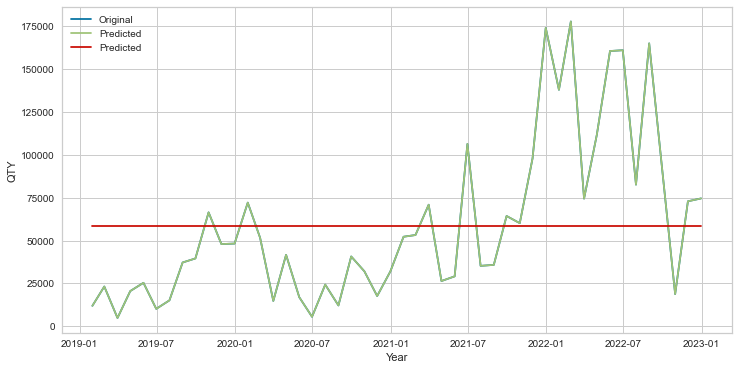

In [20]:
# Plot the data predicted data
plt.figure(figsize=(12, 6))
plt.plot(df_ts, label='Original')
plt.plot(predictions, label='Predicted')
plt.xlabel('Year')
plt.ylabel('QTY')
plt.legend()
plt.show()